In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

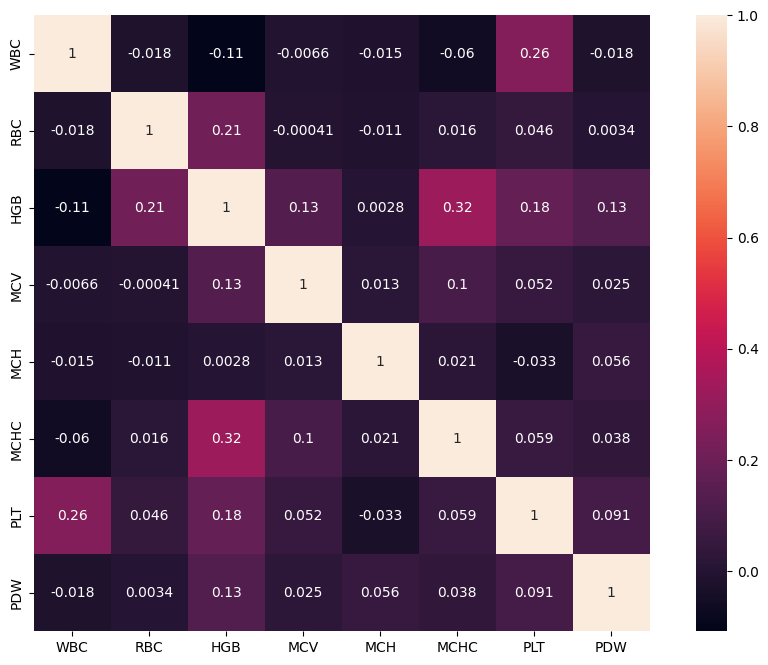

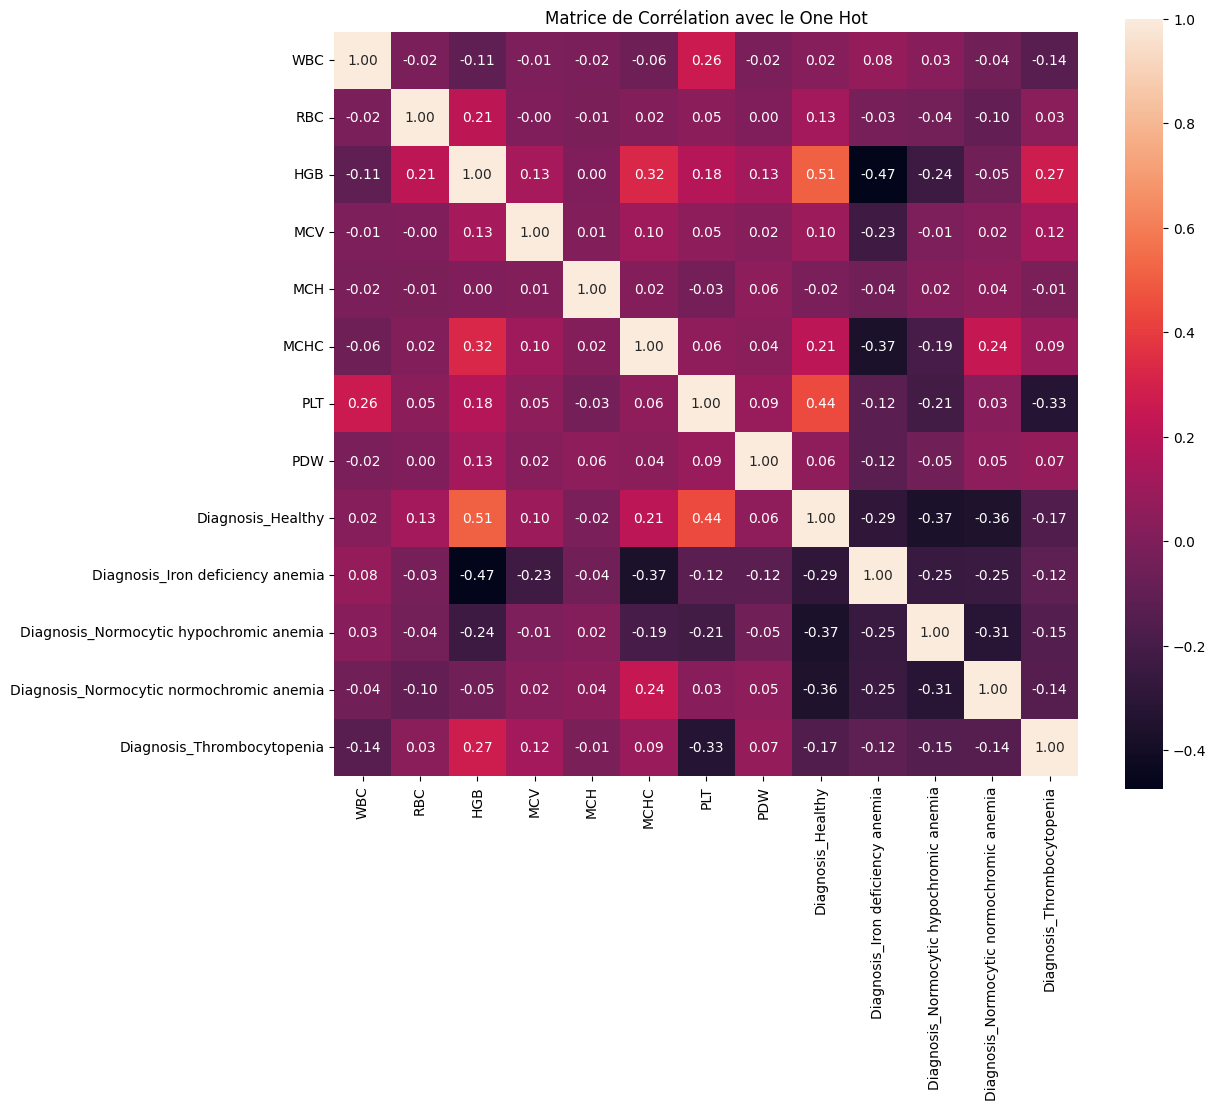

In [21]:
df = pd.read_csv('../dataset/diagnosed_cbc_data_v1.csv')
#normalizing the data
scaler = StandardScaler()
df2 = df.drop(columns="Diagnosis")
data2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

correration = data2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correration, square=True, annot=True)
plt.show()

data = df

# Normaliser les colonnes numériques
features = data.columns[:-1]
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Encoder les étiquettes de Diagnosis
data = pd.get_dummies(data, columns=['Diagnosis'])

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, square=True, annot=True, fmt='.2f')
plt.title('Matrice de Corrélation avec le One Hot')
plt.show()

# Travail sur les varibales fortement corrélées

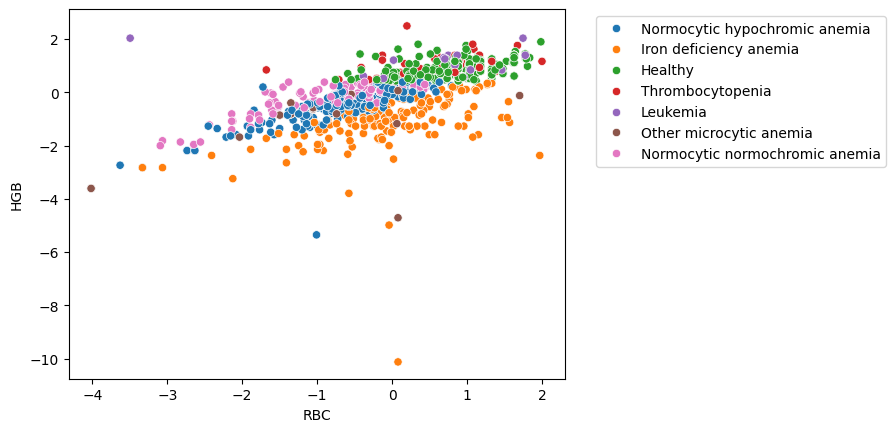

In [3]:
sns.scatterplot(x="RBC", y="HGB", data=df, hue="Diagnosis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

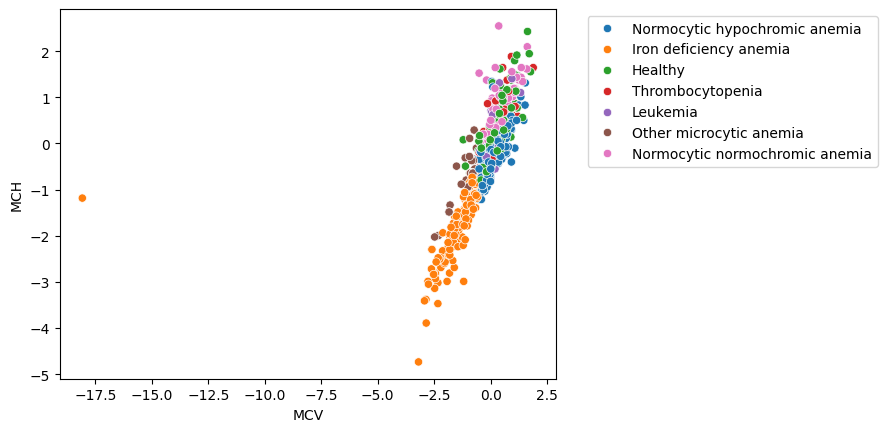

In [4]:
sns.scatterplot(x="MCV", y="MCH", data=df, hue="Diagnosis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

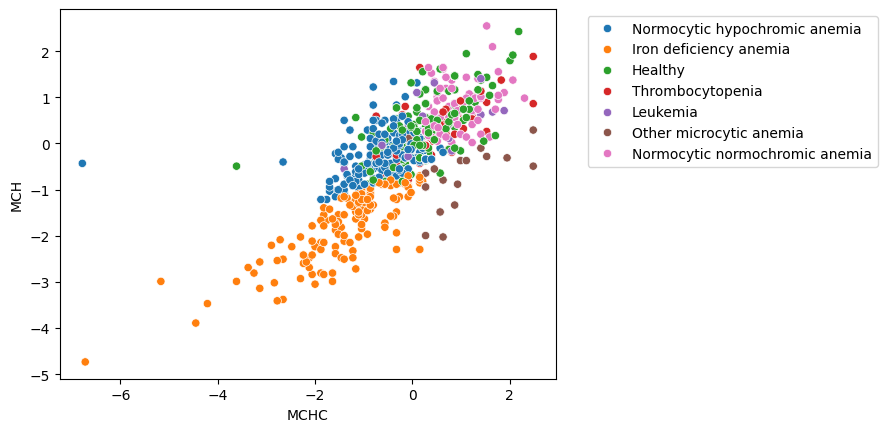

In [5]:
sns.scatterplot(x="MCHC", y="MCH", data=df, hue="Diagnosis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Multiplot

<Figure size 8000x8000 with 0 Axes>

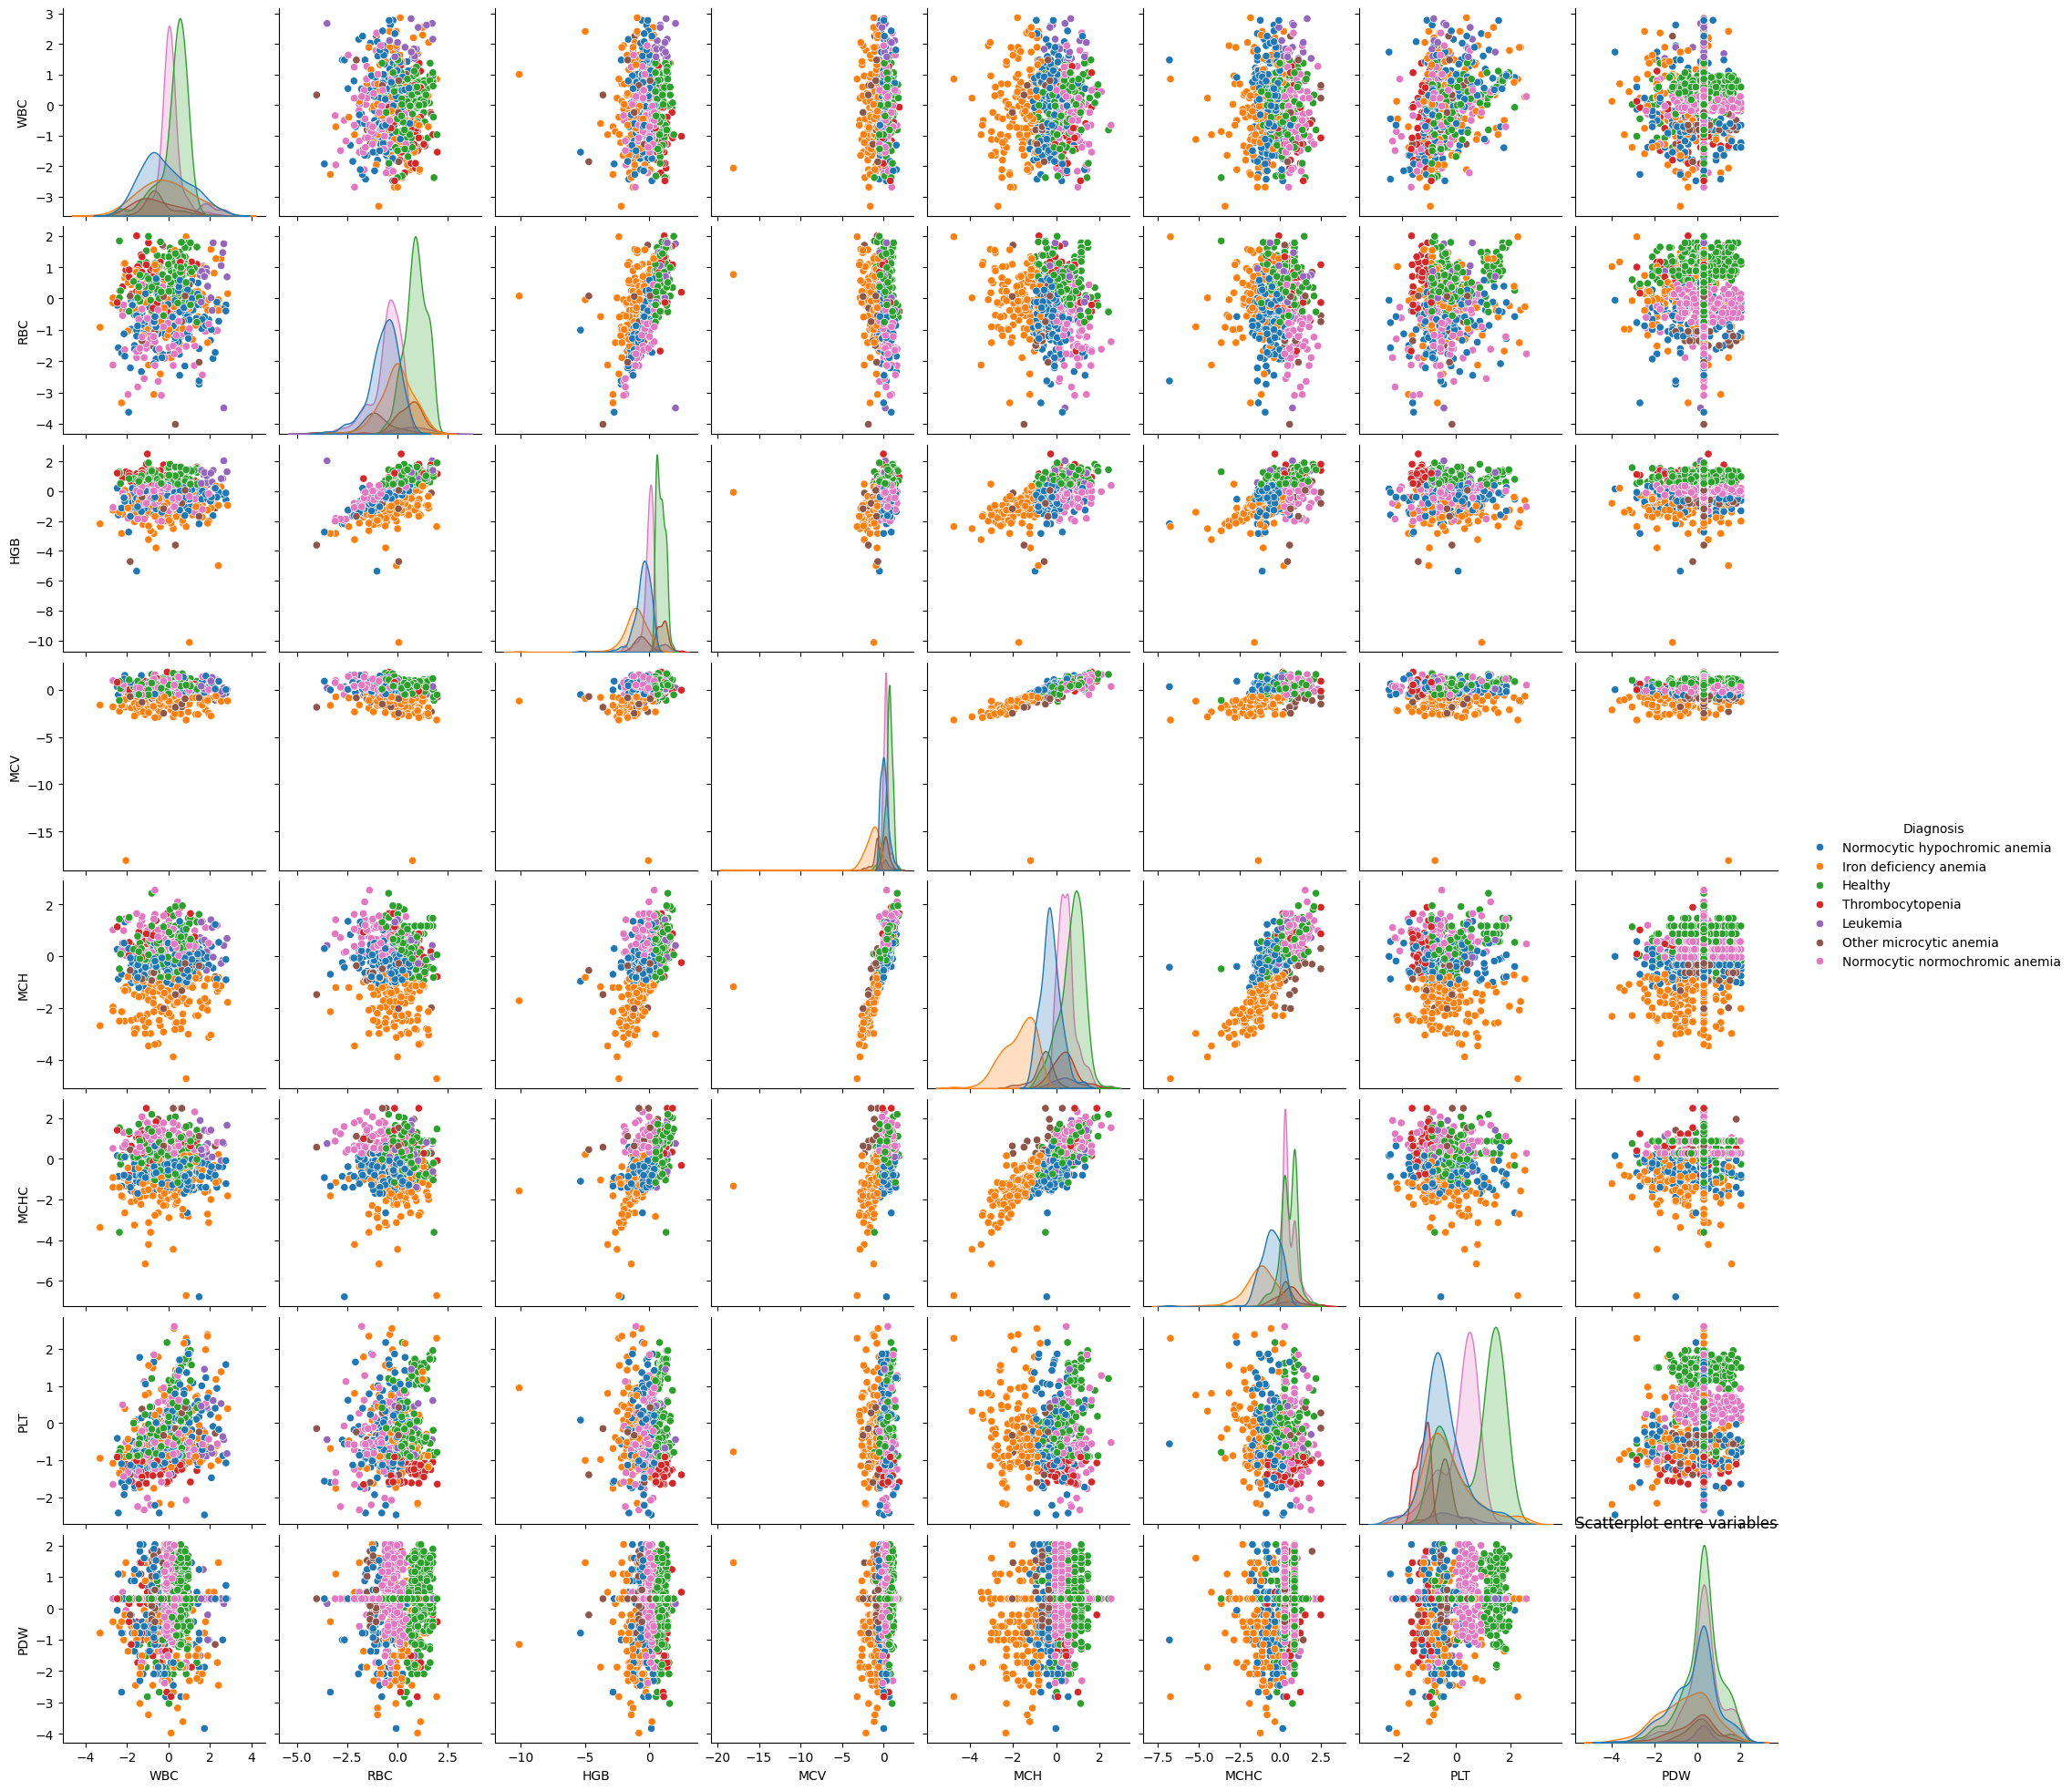

In [6]:
plt.figure(figsize=(80, 80))
sns.pairplot(df, kind='scatter', hue='Diagnosis')
plt.title('Scatterplot entre variables')
plt.show()

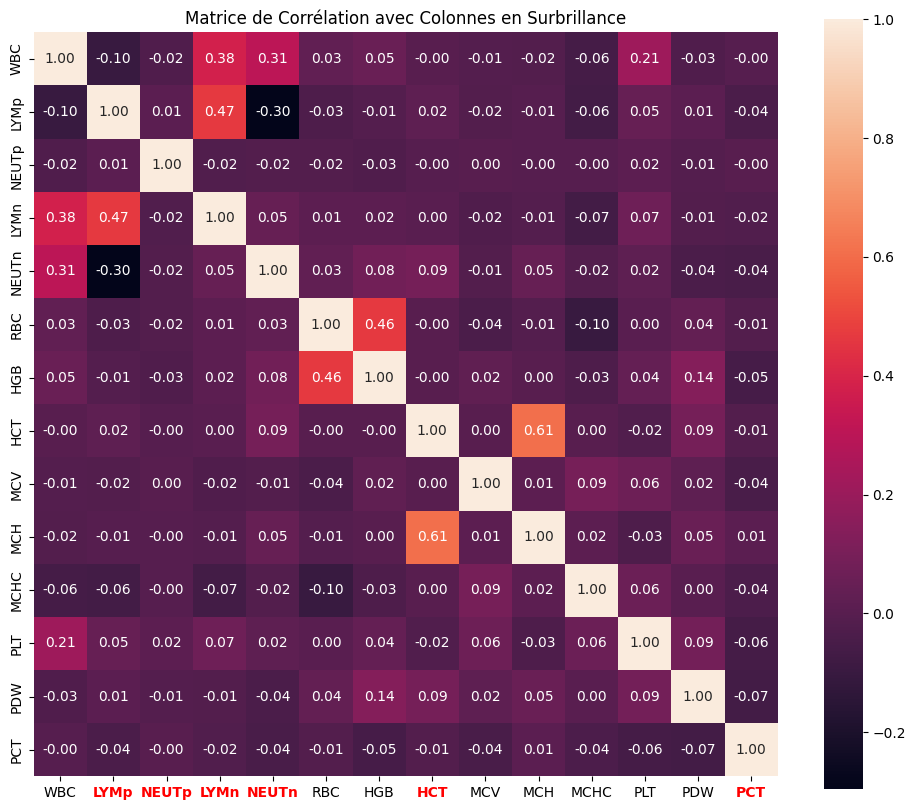

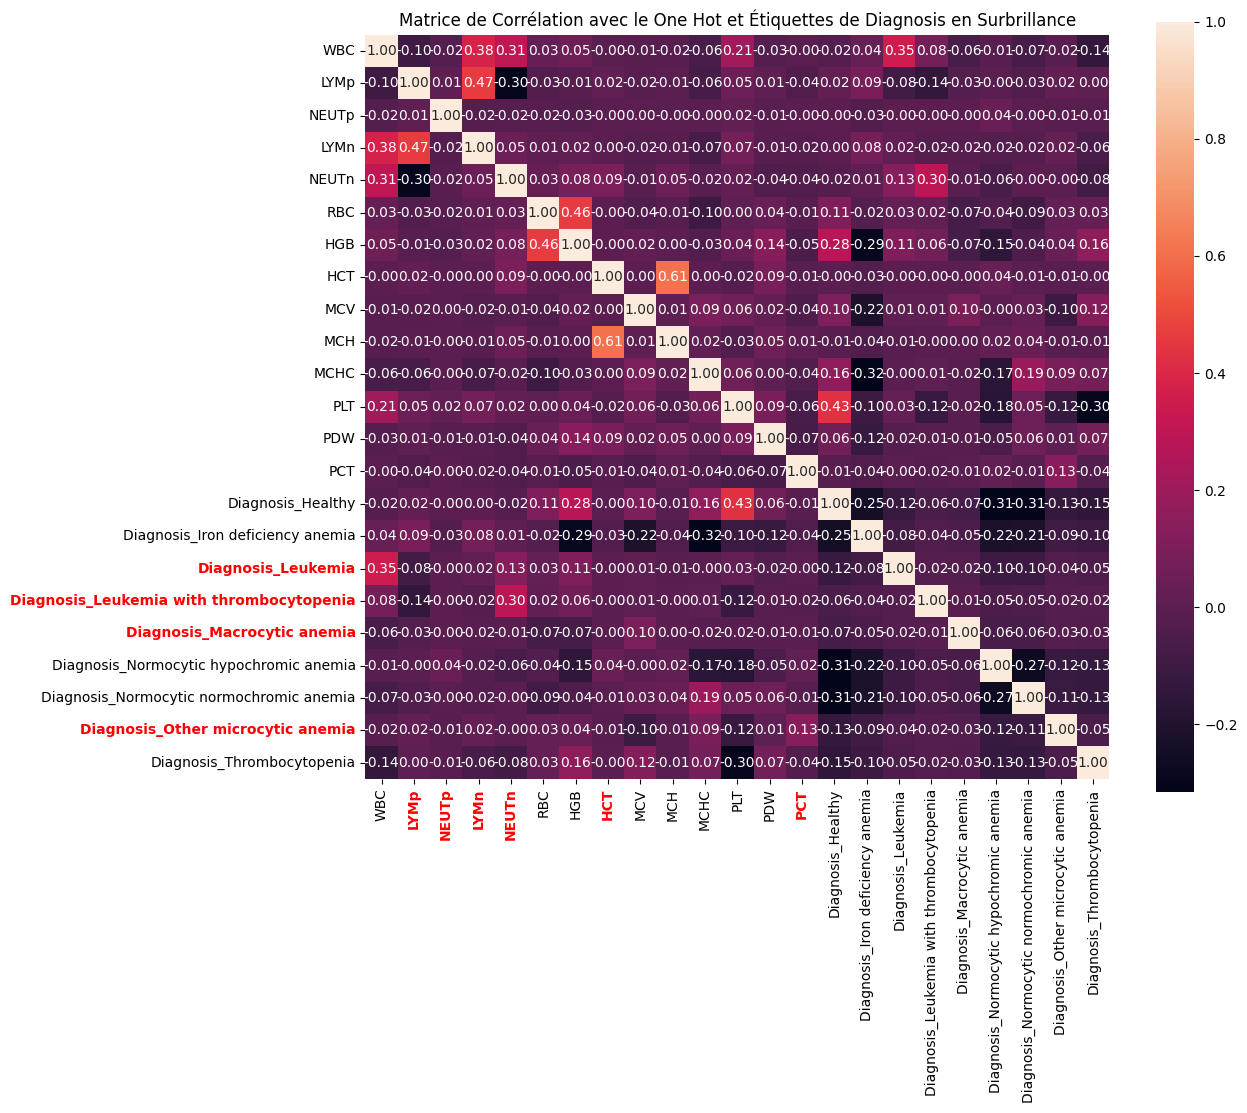

In [23]:
#meme chose avec le dataset de base
# Charger le dataset
df4 = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')

# Normaliser les données
scaler = StandardScaler()
df5 = df4.drop(columns="Diagnosis")
data2 = pd.DataFrame(scaler.fit_transform(df5), columns=df5.columns)

# Calculer la matrice de corrélation
correlation_matrix = data2.corr()

# Colonnes à mettre en surbrillance
columns_to_highlight = ['LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'PCT']

# Configurer la figure
plt.figure(figsize=(12, 10))

# Créer la heatmap principale
sns.heatmap(correlation_matrix, square=True, annot=True, fmt='.2f')

# Personnaliser les étiquettes de l'axe X
ax = plt.gca()
labels_x = ax.get_xticklabels()

# Appliquer la mise en surbrillance aux colonnes spécifiées
for label in labels_x:
    if label.get_text() in columns_to_highlight:
        label.set_color('red')
        label.set_fontweight('bold')

# Appliquer la personnalisation
ax.set_xticklabels(labels_x)

# Ajouter le titre
plt.title('Matrice de Corrélation avec Colonnes en Surbrillance')
plt.show()

# Maintenant, normaliser et encoder les étiquettes de Diagnosis
data = df4
features = data.columns[:-1]
data[features] = scaler.fit_transform(data[features])

# Encoder les étiquettes de Diagnosis
data = pd.get_dummies(data, columns=['Diagnosis'])

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Visualiser la matrice de corrélation avec le One Hot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, square=True, annot=True, fmt='.2f')

# Colonnes de diagnosis à mettre en surbrillance
diagnosis_to_highlight = ['Other microcytic anemia', 'Leukemia', 'Leukemia with thrombocytopenia', 'Macrocytic anemia']

# Personnaliser les étiquettes de l'axe X et Y
ax = plt.gca()
labels_x = ax.get_xticklabels()
labels_y = ax.get_yticklabels()

# Appliquer la mise en surbrillance aux colonnes spécifiées (X-axis)
for label in labels_x:
    if label.get_text() in columns_to_highlight:
        label.set_color('red')
        label.set_fontweight('bold')

# Appliquer la mise en surbrillance aux étiquettes de diagnosis spécifiées (Y-axis)
for label in labels_y:
    if any(diagnosis in label.get_text() for diagnosis in diagnosis_to_highlight):
        label.set_color('red')
        label.set_fontweight('bold')

# Appliquer la personnalisation
ax.set_xticklabels(labels_x)
ax.set_yticklabels(labels_y)

# Ajouter le titre
plt.title('Matrice de Corrélation avec le One Hot et Étiquettes de Diagnosis en Surbrillance')
plt.show()

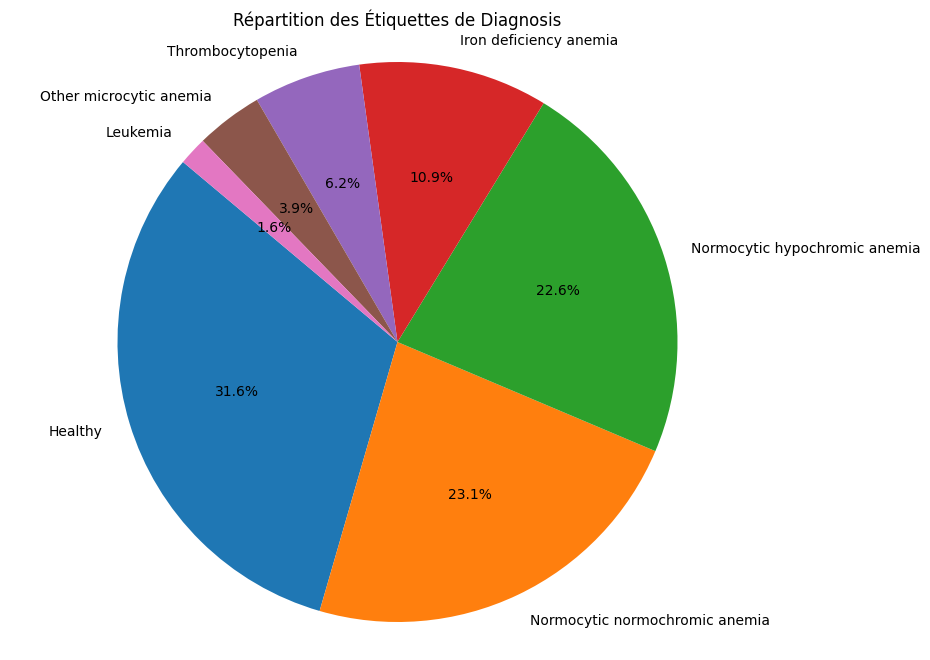

In [82]:
# Charger le dataset
df4 = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')

def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    # Suppression des outliers au-dessus du 3e quartile + 1.5 * IQR et en dessous du 1er quartile - 1.5 * IQR
    df_no_outliers = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_no_outliers


df4 = df4.drop(['LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'PCT', 'PDW'], axis=1)
df4 = df4[df4.Diagnosis != 'Leukemia with thrombocytopenia']
df4 = df4[df4.Diagnosis != 'Macrocytic anemia']
df4 = remove_outliers(df4)
# df4.to_csv('../dataset/diagnosed_cbc_data_10.csv', index=False)
# df4.shape[0]

# Compter les occurrences de chaque étiquette de Diagnosis
diagnosis_counts = df4['Diagnosis'].value_counts()

# Calculer les pourcentages
diagnosis_percentages = (diagnosis_counts / diagnosis_counts.sum()) * 100

# Créer le diagramme en camembert
plt.figure(figsize=(10, 8))
plt.pie(diagnosis_percentages, labels=diagnosis_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Étiquettes de Diagnosis')
plt.axis('equal')  # Assure que le camembert soit un cercle

# Afficher le diagramme
plt.show()

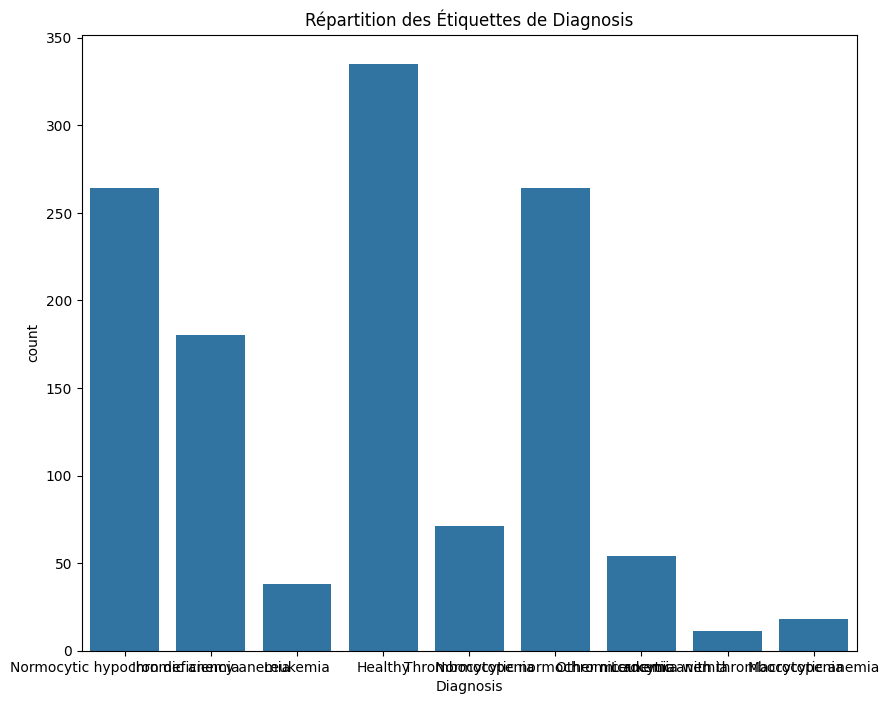

In [71]:
#afficher les diagnostics en barplot count
plt.figure(figsize=(10, 8))
sns.countplot(data=df4, x='Diagnosis')
plt.title('Répartition des Étiquettes de Diagnosis')
plt.show()

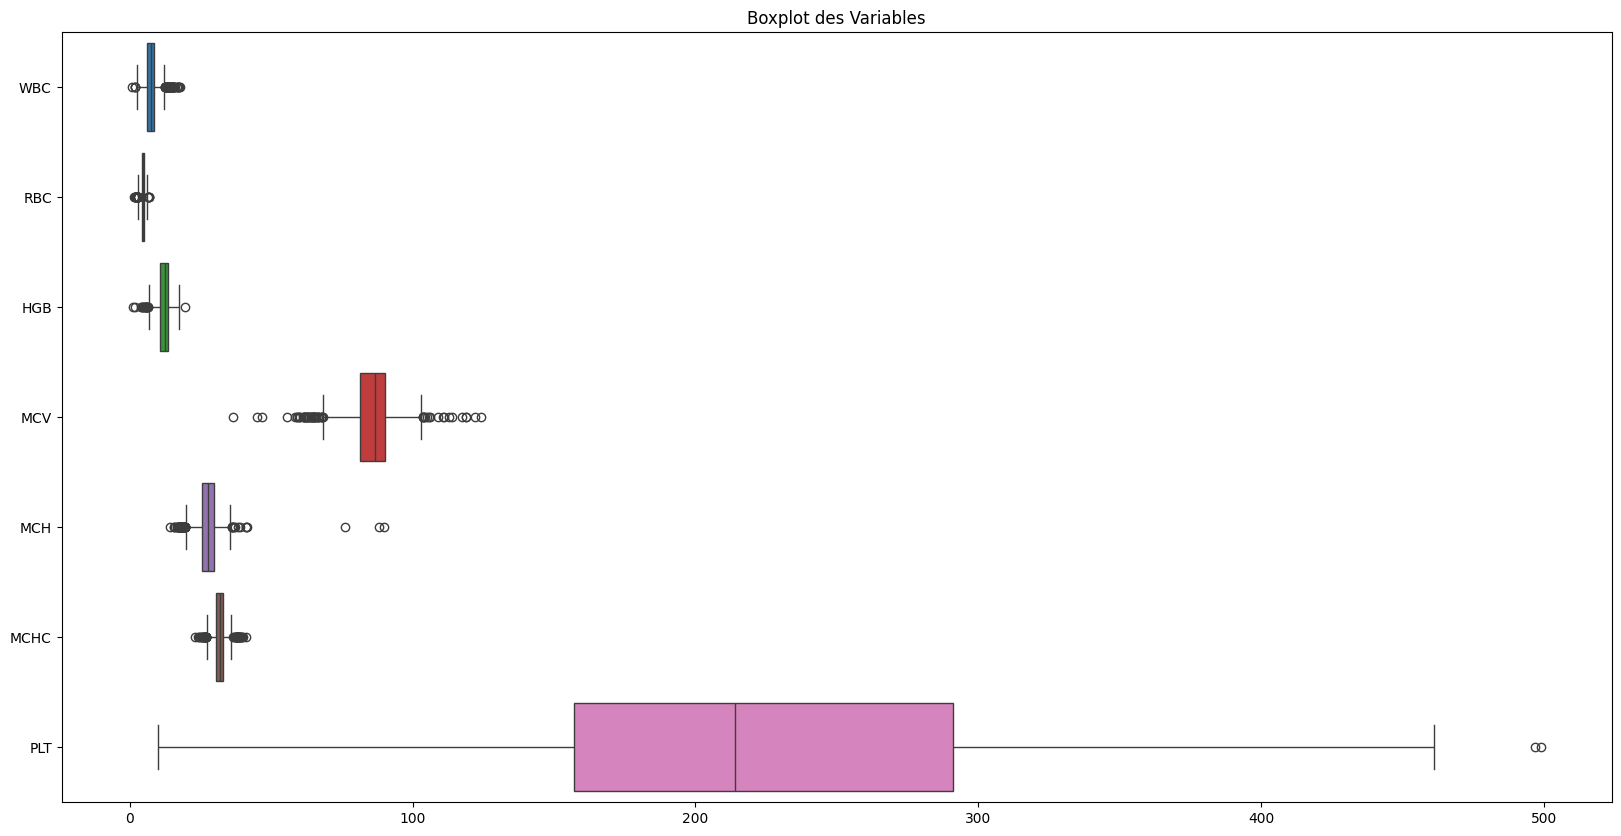

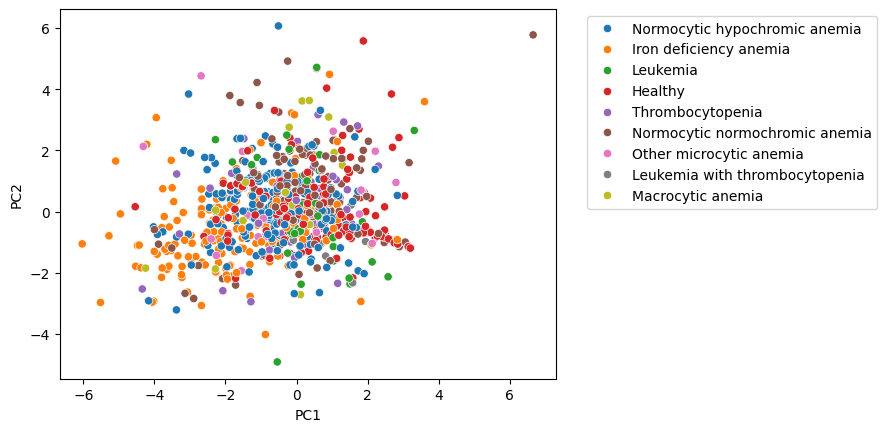

In [112]:
from sklearn.decomposition import PCA
df4 = pd.read_csv('../dataset/data_9diagnosis.csv')

data = df4.drop(columns='Diagnosis')

#enlever les points les plus extreme positif pour la variable MCH
data = data[data.MCH < 200]

#faire des bocplots pour chaque variable
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot des Variables')
plt.show()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
pca = PCA(n_components=5)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=df4.Diagnosis, data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [106]:
df4.shape[0]

1235